# IPL Extract Data Analysis.

## import modules

In [1]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pio.templates.default = "presentation"

C:\Users\aayyu\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
deliveries=pd.read_csv("D:\\SHAREit\\Indian Premier League\\deliveries.csv")
matches=pd.read_csv("D:\\SHAREit\\Indian Premier League\\matches.csv")
pd.set_option("display.max_columns",None)

In [3]:
deliveries.head()


match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  wide_runs  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0          0         0   
1     2  DA Warner    S Dhawan  TS Mills              0          0         0   
2     3  DA Warner    S Dhawan  TS Mills              0          0         0   
3     4  DA Warner    S Dhawan  TS Mills              0          0         0   
4     5  DA Warner    S Dhawan  TS Mills              0          2         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs player_dismissed dismissal_kind fielder  
0           0              NaN            NaN     NaN  
1           0              NaN            NaN     NaN  
2           4              NaN            NaN     NaN  
3           0              NaN            NaN     NaN  
4           2              NaN            NaN     NaN

In [4]:
matches.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [5]:
T5teams = ['Mumbai Indians', 'Kolkata Knight Riders', 'Chennai Super Kings', 'Royal Challengers Bangalore', 'Kings XI Punjab']
data = matches[['season','winner']].copy().dropna()
data['win_count'] = data.groupby(['season','winner'])['winner'].transform('count')
perc = data.loc[:,["season","winner",'win_count']]
perc = perc.drop_duplicates()
perc = perc.loc[perc['winner'].isin(T5teams)]
perc = perc.sort_values("season")
figure1=px.bar(perc,x='winner', y="win_count", animation_frame="season", 
           animation_group="winner", color="winner", hover_name="winner")
figure1.update_layout(title='Number of Wins by top teams per year', showlegend=False)
figure1.show()


In [6]:
df = deliveries['dismissal_kind'].value_counts().reset_index()
df.columns = ['Dismissal Kind', 'Count']
figure2 = px.pie(df, values='Count', names='Dismissal Kind',title='Most Number of dismissal in IPL 2019')
figure2.update_traces(textposition='inside', textinfo='percent+label')
figure2.show()

In [7]:
df = deliveries.loc[deliveries['wide_runs']>0, ['bowler', 'wide_runs']].copy()
df['total_wides'] = df.groupby('bowler')['wide_runs'].transform('count')
df = df.drop('wide_runs', axis=1).drop_duplicates().reset_index(drop=True).sort_values('total_wides',ascending=False).head(15)
figure3 = px.bar(df, x='bowler', y='total_wides', color='total_wides',title='Bowlers with most wide balls')
figure3.show()

In [8]:
df = deliveries[['batsman', 'total_runs']].copy()
df['total_runs'] = df.groupby('batsman')['total_runs'].transform('sum')
df = df.drop_duplicates().sort_values('total_runs').tail(15).reset_index(drop=True)
figure4 = px.bar(df, x='batsman', y='total_runs', color='total_runs',title='Highest runs by batsman')
figure4.show()

In [9]:
df = deliveries[['batsman', 'total_runs']].copy()
df['ball_count'] = df.groupby('batsman')['total_runs'].transform('count')
df['total_runs'] = df.groupby('batsman')['total_runs'].transform('sum')
df['Strike Rate'] = (df['total_runs'] / df['ball_count']) * 100
df = df.drop_duplicates().sort_values('Strike Rate').tail(15).reset_index(drop=True)
figure5 = px.bar(df, y='batsman', x='Strike Rate', color='Strike Rate',title='Batsmen with best strike rate',orientation="h")
figure5.show()

In [10]:
df = deliveries[['batsman', 'total_runs']].copy()
df['ball_count'] = df.groupby('batsman')['total_runs'].transform('count')
df['total_runs'] = df.groupby('batsman')['total_runs'].transform('sum')
df['Strike Rate'] = (df['total_runs'] / df['ball_count']) * 100
df = df[df['Strike Rate']>0].drop_duplicates().sort_values('Strike Rate').head(15).reset_index(drop=True)
figure6 = px.bar(df, y='batsman', x='Strike Rate', color='Strike Rate',orientation="h")
figure6.update_layout(title='Batsmen with worst strike rate')
figure6.show()

In [11]:
df = deliveries.loc[deliveries['is_super_over']==1, ['batsman','total_runs']].copy()
df['total_runs'] = df.groupby('batsman')['total_runs'].transform('sum')
df = df.drop_duplicates().sort_values('total_runs', ascending=False).head(15).reset_index(drop=True)
figure7 = px.scatter(df, x='batsman', y='total_runs', color='total_runs',size="total_runs")
figure7.update_layout(title='Batsman who scored most runs in super overs')
figure7.show()

In [12]:
df = deliveries[['bowling_team','dismissal_kind','fielder']].copy()
df = df.dropna()
df = df[df['dismissal_kind']=='stumped']
df['stump_count'] = df.groupby(['bowling_team','fielder'])['dismissal_kind'].transform('count')
df = df.drop('dismissal_kind', axis=1).drop_duplicates().sort_values('stump_count').tail(20).reset_index(drop=True)
figure8 = px.bar(df, x='fielder', y='stump_count', color='bowling_team')
figure8.update_layout(title='Best Stumpers and their teams')
figure8.show()

# Now let's explore the matches dataset.

In [13]:
data = matches.copy()
df = data[['city','winner']].copy().dropna()
df['win_count'] = df.groupby(['city','winner'])['winner'].transform('count')
df = df.drop_duplicates().sort_values('win_count').tail(40)
figure9 = px.bar(df, x='winner', y='win_count', color='city')
figure9.update_layout(title='In which City which Team has won maximum Matches')
figure9.show()

In [14]:
top_players = data['player_of_match'].value_counts().reset_index()['index'].tolist()[:7]
df = data[['winner','player_of_match']].dropna()
df['POM_count'] = df.groupby(['winner','player_of_match'])['player_of_match'].transform('count')
df = df.drop_duplicates().reset_index(drop=True).sort_values('POM_count')
df = df[df['player_of_match'].isin(top_players)]
figure10 = px.bar(df, x='player_of_match', y='POM_count', color='winner')
figure10.update_layout(title='Players with most Player of the match titles and their teams')
figure10.show()

In [15]:
df = data['result'].value_counts().reset_index()
df.columns = ['result', 'count']
figure11 = px.pie(df, values='count', names='result',title='Most common results')
figure11.update_traces(textposition='inside', textinfo='percent+label')
figure11.show()

In [16]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

In [17]:
app.layout = html.Div([html.H1(children="IPL Data Reporting DashBoard",
                              style={"Color":"#ffffff","textAlign":"center","background-color":"#095de3"}
                              ),
                       html.Div(children="IPL Reports",
                                style={"Color":"#ffffff","textAlign":"center","background-color":"#095de3"}
                               ),
                       dcc.Graph(figure=figure1),
                       dcc.Graph(figure=figure10),
                       dcc.Graph(figure=figure9),
                       dcc.Graph(figure=figure4),
                       dcc.Graph(figure=figure7),
                       dcc.Graph(figure=figure8),
                       dcc.Graph(figure=figure5),
                       dcc.Graph(figure=figure2),
                       dcc.Graph(figure=figure6),
                       dcc.Graph(figure=figure3),
                       dcc.Graph(figure=figure11)
                      ],style={"background-color":"#095de3"})

In [ ]:
if __name__=="__main__":
    app.run_server(port=7080)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:7080/ (Press CTRL+C to quit)
127.0.0.1 - - [16/Dec/2020 15:13:43] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Dec/2020 15:13:46] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [16/Dec/2020 15:13:46] "GET /_dash-dependencies HTTP/1.1" 200 -


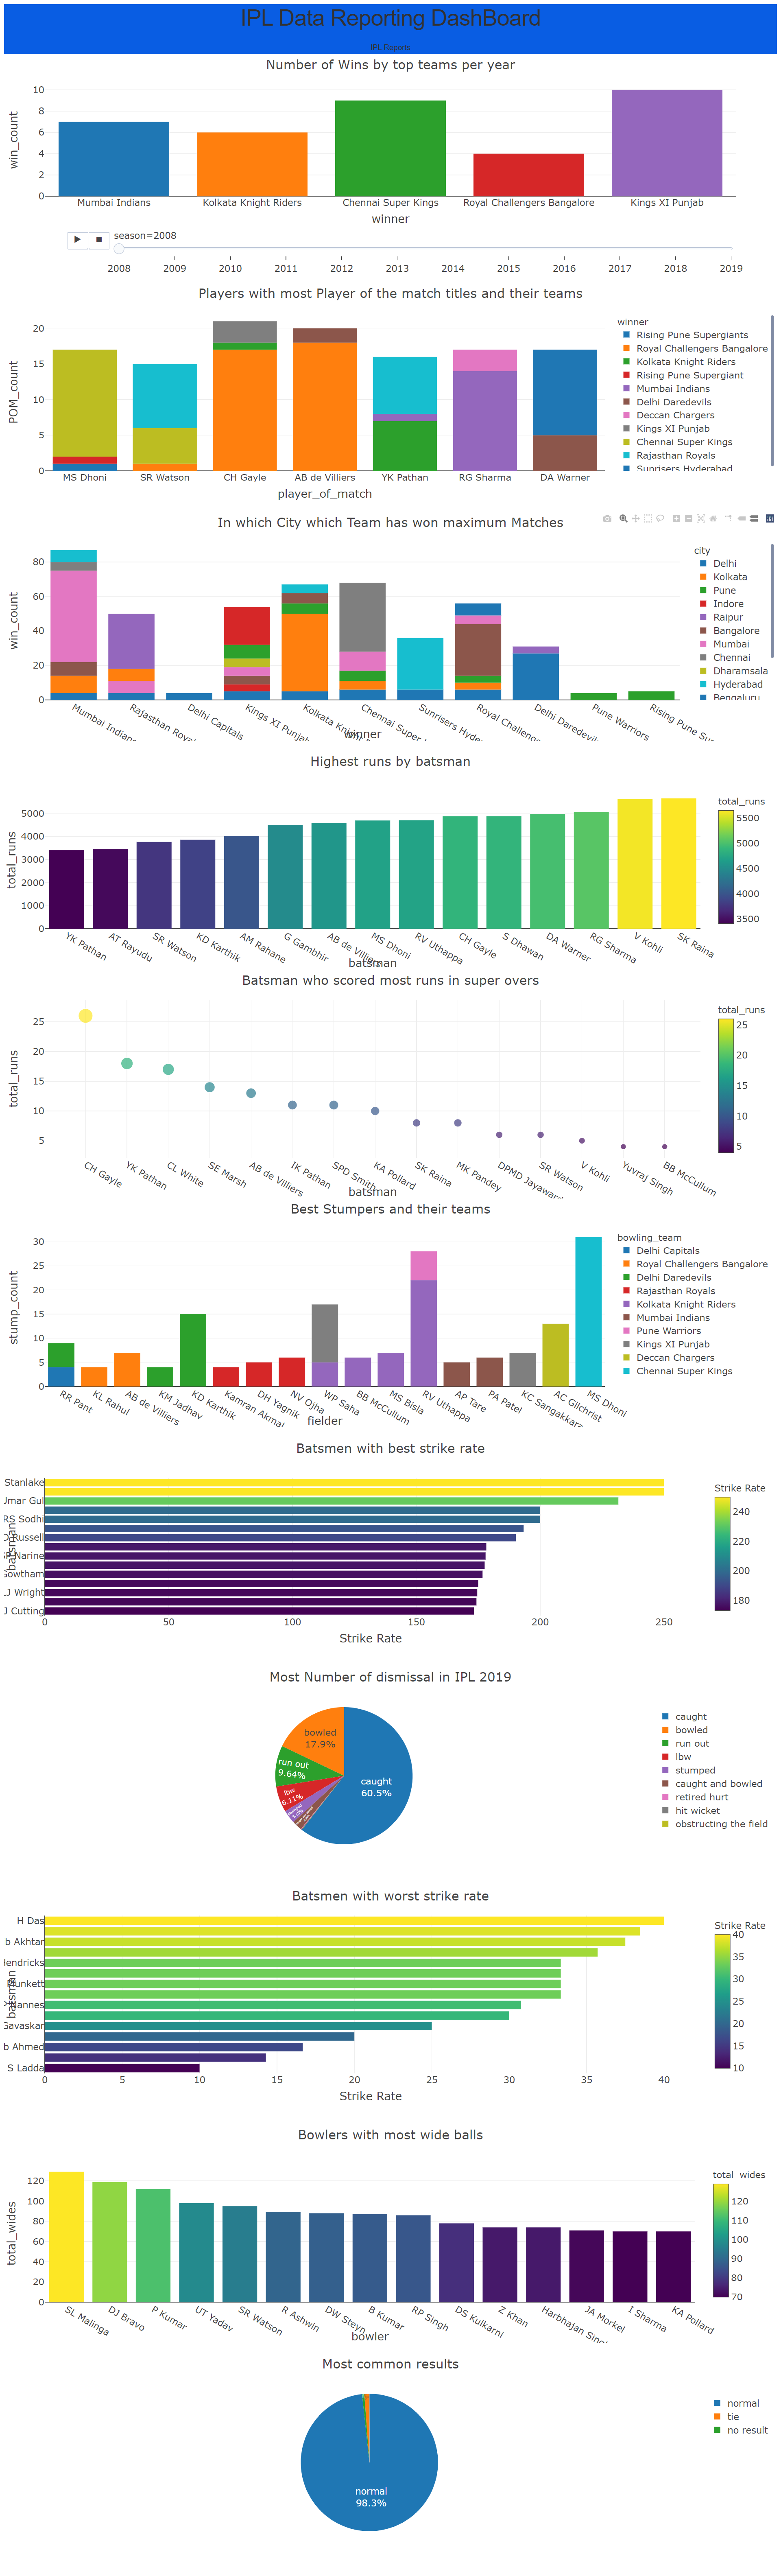